# Project Planning

In [1]:
# Libraries
# Importing the Data
# 1) Nature of Data
# 2) Understand the Data
# 3) Missing Data
# 4) Feature Engineering
# 5) Data Preprocessing for Model
# 6) Seperate the Data and ML Function
# 7) Building Machine Learning Models
# 8) Model Results

### Libraries

In [2]:
#Basic imports
import re
import statistics
import time
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

#Over Sampling and Under Sampling
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

#Transformers, Metrics, Imputers and Transformers
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_predict
from sklearn import model_selection
from sklearn import metrics
from feature_engine.imputation import RandomSampleImputer
from sklearn.model_selection import train_test_split
from feature_engine.transformation import PowerTransformer
from sklearn.inspection import permutation_importance

#Models
from sklearn.linear_model import LinearRegression, SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

### Importing the Data

In [3]:
#importing the training set
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
gender_submission = pd.read_csv('data/gender_submission.csv') # example of what a submission should look like
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
815,816,0,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0000,B102,S
441,442,0,3,"Hampe, Mr. Leon",male,20.0,0,0,345769,9.5000,NaN,S
499,500,0,3,"Svensson, Mr. Olof",male,24.0,0,0,350035,7.7958,NaN,S
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
620,621,0,3,"Yasbeck, Mr. Antoni",male,27.0,1,0,2659,14.4542,NaN,C


### 1) Nature of Data

In [4]:
#understand the nature of the data
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#understand the nature of the data
train.shape

(891, 12)

In [6]:
#understand the nature of the data
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
#understand the nature of the data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
#Converting datatypes of 'Survived' and 'Pclass' features to object. Since they are not integers.
train['Survived'] = train['Survived'].astype('object')
train['Pclass'] = train['Pclass'].astype('object')

In [9]:
#understand the nature of the data
train["Age"] = pd.to_numeric(train["Age"])
train["Fare"] = pd.to_numeric(train["Fare"])

### 2) Understand the data 

In [10]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
# look at numeric and categorical values separately 
df_num = train[['Age','SibSp','Parch','Fare']]
df_cat = train[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']] 

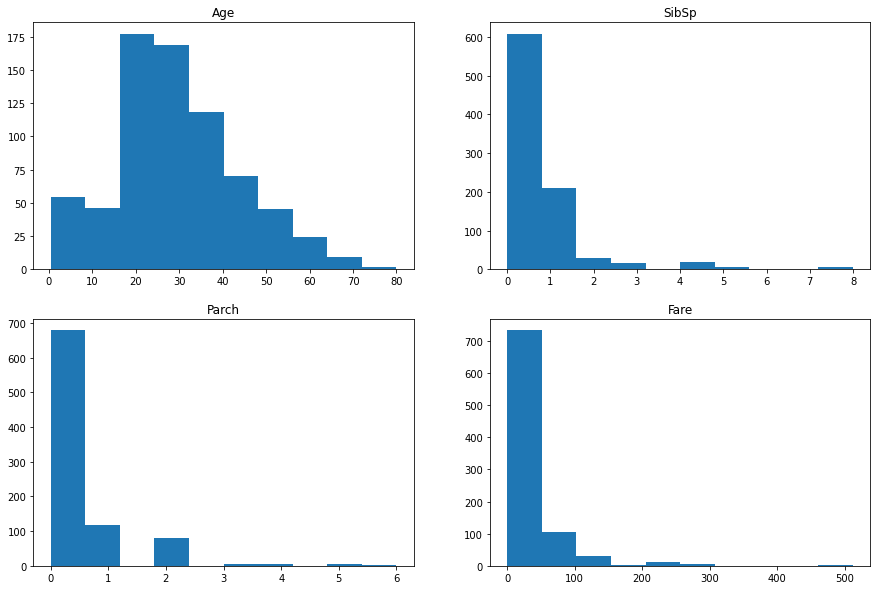

In [12]:
#distributions for all numeric variables

fig = plt.figure(figsize=(15,10))
for count, value in enumerate(list(df_num.columns)):
    fig.add_subplot(2,2,count+1).hist(df_num[value])
    plt.title(value)

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


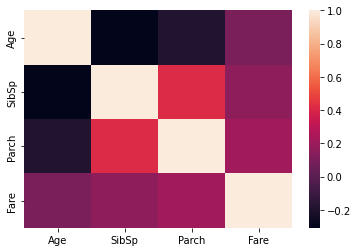

In [13]:
#Heatmap Correlation
print(df_num.corr())
sns.heatmap(df_num.corr());

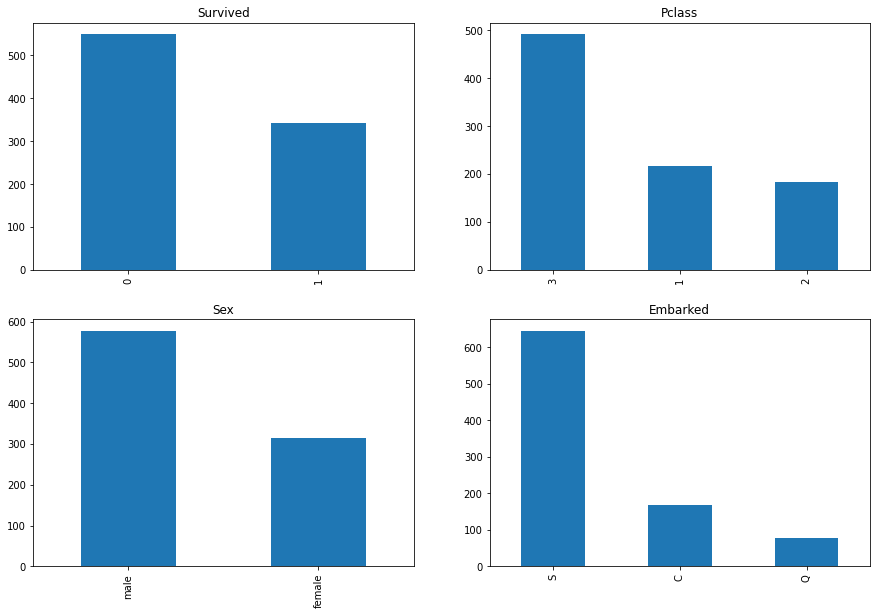

In [14]:
#distributions for categorical variables except for Cabin and Ticket

cat_list = ['Survived', 'Pclass', 'Sex', 'Embarked']
fig = plt.figure(figsize=(15,10))
for count, value in enumerate(cat_list):
    fig.add_subplot(2,2,1+count)
    df_cat[value].value_counts().plot(kind="bar")
    plt.title(value)

In [15]:
# compare survival rate across Age, SibSp, Parch and Fare
pd.pivot_table(train, index = "Survived", values = ["Age", "SibSp", "Parch", "Fare"])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


### 3)  Handling Missing Variables 

#### Methodology:

• Greater than 30% of values missing: Potentially drop feature or row 

• Less than 30% of values missing: impute a value that make sense e.g. Median, mean, mode

##### Train Dataset

In [16]:
#Building a Datagrame to represent missing data
missing_data_train = pd.DataFrame(data=train.isnull().sum().sort_values(ascending = False)/len(train))  #NaN count for each column
missing_data_train = missing_data_train.reset_index()
missing_data_train.rename(columns={"index": "variables", 0: "missing %"}).head(5)

,variables,missing %
0,Cabin,0.771044
1,Age,0.198653
2,Embarked,0.002245
3,PassengerId,0.000000
4,Survived,0.000000


##### Test Dataset

In [17]:
missing_data_test = pd.DataFrame(data=test.isnull().sum().sort_values(ascending = False)/len(test))  #NaN count for each column
missing_data_test = missing_data_test.reset_index()
missing_data_test.rename(columns={"index": "variables", 0: "missing %"}).head(5)

,variables,missing %
0,Cabin,0.782297
1,Age,0.205742
2,Fare,0.002392
3,PassengerId,0.000000
4,Pclass,0.000000


#### Numerical Features

##### From Train Dataset split into train and test

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    train.drop(['Survived'], axis=1),
    train['Survived'],
    test_size=0.3,
    random_state=0
)

##### Age

In [19]:
def plot_hist(feature, dataset):
    fig, ax = plt.subplots(2, 1, figsize=(10, 8))
    
    sns.histplot(data = dataset[feature], kde = True, ax = ax[0])

    ax[0].axvline(x = dataset[feature].mean(), color = 'r', linestyle = '--', linewidth = 2, label = 'Mean: {}'.format(round(dataset[feature].mean(), 3)))
    ax[0].axvline(x = dataset[feature].median(), color = 'orange', linewidth = 2, label = 'Median: {}'.format(round(dataset[feature].median(), 3)))
    ax[0].axvline(x = statistics.mode(dataset[feature]), color = 'yellow', linewidth = 2, label = 'Mode: {}'.format(statistics.mode(dataset[feature])))
    ax[0].legend()
    
    sns.boxplot(x = dataset[feature], ax = ax[1])
    
    plt.show()

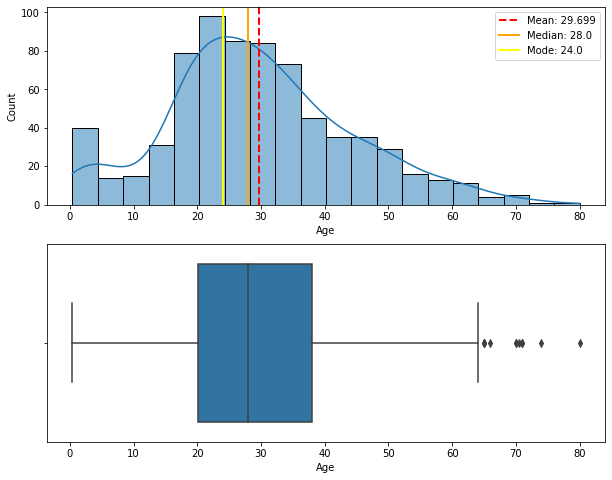

In [20]:
plot_hist('Age', train)

    Random Sample Imputer doesn't change the distribution of the feature but it draws samples from the original feature distribution and fills the missing values. Hence, the variance of the feature is not changed.

    Note: It is important to set the seed to control the randomness of the feature distribution while using random sample imputation.


In [21]:
age_imputer = RandomSampleImputer(variables = ['Age'], random_state = 1111)
age_imputer.fit(X_train, y_train)

X_train = age_imputer.transform(X_train)
X_test = age_imputer.transform(X_test)

    Power transforms are a family of parametric, monotonic transformations that are applied to make data more Gaussian-like.

In [22]:
age_transform = PowerTransformer(variables = ['Age'], exp = 0.65)
age_transform.fit(X_train, y_train)

X_train = age_transform.transform(X_train)
X_test = age_transform.transform(X_test)

##### Embarked

    Instead of dropping the two rows, I had used mode imputation to fill the missing data.

In [23]:
X_train['Embarked'] = X_train['Embarked'].fillna(statistics.mode(X_train['Embarked']))
X_test['Embarked'] = X_test['Embarked'].fillna(statistics.mode(X_train['Embarked']))

#####   Cabin 

    Due to it's high missing value percentage, I had to drop this column.

In [24]:
X_train = X_train.drop('Cabin', axis=1)
X_test = X_test.drop('Cabin', axis=1)

##### Fare (transformation)

    Applying YeoJohnson to make the distribution more Gaussian-Like.

In [25]:
fare_mean = X_train['Fare'].mean() # To replace the missing data in test data.

from feature_engine.transformation import YeoJohnsonTransformer

fare_yeojohnson = YeoJohnsonTransformer(variables=['Fare'])
fare_yeojohnson.fit(X_train, y_train)

X_train = fare_yeojohnson.transform(X_train)
X_test = fare_yeojohnson.transform(X_test)

### 4) Feature Engineering 

#### Name



    Instead of dropping the name feature due to its high cardinality, we can create a new feature out of it.

        I created 5 groups out of it.



In [26]:
def name_transform(transform_dataset):
    
    dataset = transform_dataset.copy()
    
    dataset['Name'] = dataset['Name'].apply(lambda x: 'Mr' if 'Mr.' in x else x)
    dataset['Name'] = dataset['Name'].apply(lambda x: 'Mrs' if 'Mrs.' in x else x)
    dataset['Name'] = dataset['Name'].apply(lambda x: 'Miss' if 'Miss' in x else x)
    dataset['Name'] = dataset['Name'].apply(lambda x: 'Master' if 'Master' in x else x)
    dataset['Name'] = dataset['Name'].apply(lambda x: 'Other' if len(str(x)) > 6 else x)
    
    return dataset

In [27]:
X_train = name_transform(X_train)
X_test = name_transform(X_test)

#### Ticket

    Instead of removing the Ticket feature from the dataset because of it's high cardinality, we can use this feature to derive new features which might help us improving our model performance. This is known as feature engineering.

        I created 6 groups from the existing tickets names. These 6 groups are names according to their ticket names.

        Note: If this feature acts as a bad predictor, during feature selection, algorithm will remove it automatically.

In [28]:
def ticket_transform(transform_dataset):
    
    dataset = transform_dataset.copy()
    
    dataset['Ticket'] = dataset['Ticket'].apply(lambda x: 'alpha_numeric_ticket' if re.search('[a-zA-Z]', str(x)) else x)

    dataset['Ticket'] = dataset['Ticket'].apply(lambda x: 'three_digit_ticket' if len(str(x)) == 3 else x)
    dataset['Ticket'] = dataset['Ticket'].apply(lambda x: 'four_digit_ticket' if len(str(x)) == 4 else x)
    dataset['Ticket'] = dataset['Ticket'].apply(lambda x: 'five_digit_ticket' if len(str(x)) == 5 else x)
    dataset['Ticket'] = dataset['Ticket'].apply(lambda x: 'six_digit_ticket' if len(str(x)) == 6 else x)
    dataset['Ticket'] = dataset['Ticket'].apply(lambda x: 'seven_digit_ticket' if len(str(x)) == 7 else x)
    
    return dataset

In [29]:
X_train = ticket_transform(X_train)
X_test = ticket_transform(X_test)

###  5) Feature Mapping 

    • PClass: instead of having numbers, it is preferable having strings
    • Embarked: instead of having a letter, it is preferable having the whole name

In [30]:
pClass_mappings = {1: 'Upper', 2: 'Middle', 3: 'Lower'}
embarked_mappings = {'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'}

In [31]:
X_train['Pclass'] = X_train['Pclass'].map(pClass_mappings)
X_test['Pclass'] = X_test['Pclass'].map(pClass_mappings)

X_train['Embarked'] = X_train['Embarked'].map(embarked_mappings)
X_test['Embarked'] = X_test['Embarked'].map(embarked_mappings)

#### Dropping Features

    We drop PassengerId due to its high cardinality

In [32]:
X_train = X_train.drop('PassengerId', axis=1)
X_test = X_test.drop('PassengerId', axis=1)

### 6) Data Preprocessing for Model 

• One hot encode the categorical columns

• Min Max scaler the continous columns

#### One hot encoding

In [33]:
top_four_categories = ['Name', 'Ticket']
ohe = ['Pclass', 'Sex', 'Embarked']

    I created two columns using Name and Ticket features. Instead of using every group that I created I am only using top 3 groups to avoid higher dimensionality.

In [34]:
from feature_engine.encoding import OneHotEncoder

ohc_ticket = OneHotEncoder(top_categories = 4, variables = top_four_categories)
ohc_ticket.fit(X_train, y_train)

X_train = ohc_ticket.transform(X_train)
X_test = ohc_ticket.transform(X_test)

In [35]:
ohe = OneHotEncoder(variables = ['Pclass', 'Sex', 'Embarked'])
ohe.fit(X_train, y_train)

X_train = ohe.transform(X_train)
X_test = ohe.transform(X_test)

In [75]:
X_train.columns

SyntaxError: unmatched ')' (207847224.py, line 1)

#### Min Max Scaling

In [36]:
scaler = MinMaxScaler(feature_range = (0, 1))

scaler.fit(X_train) 

X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

In [37]:
y_train = y_train.reset_index(drop = True)
y_test = y_test.reset_index(drop = True)

In [38]:
X_train

,Age,SibSp,Parch,Fare,Name_Mr,Name_Miss,Name_Mrs,Name_Master,Ticket_six_digit_ticket,Ticket_alpha_numeric_ticket,Ticket_five_digit_ticket,Ticket_four_digit_ticket,Pclass_Upper,Pclass_Lower,Pclass_Middle,Sex_male,Sex_female,Embarked_Southampton,Embarked_Cherbourg,Embarked_Queenstown
0,0.734437,0.000,0.000000,0.631967,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.714385,0.125,0.000000,0.779056,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.013900,0.625,0.333333,0.712914,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.764006,0.000,0.166667,0.780002,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.609435,0.125,0.000000,0.540818,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,0.609435,0.125,0.166667,0.789513,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
619,0.364423,0.125,0.000000,0.446057,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
620,0.364423,0.000,0.000000,0.443630,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
621,0.576168,0.125,0.000000,0.569035,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


### 7) Feature Selection

In [39]:
y_train=y_train.astype('int')

In [40]:
X_train.head(1)

,Age,SibSp,Parch,Fare,Name_Mr,Name_Miss,Name_Mrs,Name_Master,Ticket_six_digit_ticket,Ticket_alpha_numeric_ticket,Ticket_five_digit_ticket,Ticket_four_digit_ticket,Pclass_Upper,Pclass_Lower,Pclass_Middle,Sex_male,Sex_female,Embarked_Southampton,Embarked_Cherbourg,Embarked_Queenstown
0,0.734437,0.0,0.0,0.631967,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [41]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression #Selecting the Best important features according to Logistic Regression

rfe_selector = RFE(estimator=GradientBoostingClassifier(), n_features_to_select = 15, step = 1)

rfe_selector.fit(X_train, y_train)

important_columns = X_train.columns[rfe_selector.get_support()]

In [42]:
important_columns = list(important_columns)

In [43]:
X_train = X_train[important_columns]
X_train

,Age,SibSp,Parch,Fare,Name_Mr,Name_Master,Ticket_six_digit_ticket,Ticket_alpha_numeric_ticket,Ticket_four_digit_ticket,Pclass_Upper,Pclass_Lower,Sex_male,Sex_female,Embarked_Southampton,Embarked_Queenstown
0,0.734437,0.000,0.000000,0.631967,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.714385,0.125,0.000000,0.779056,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.013900,0.625,0.333333,0.712914,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,0.764006,0.000,0.166667,0.780002,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0.609435,0.125,0.000000,0.540818,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,0.609435,0.125,0.166667,0.789513,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
619,0.364423,0.125,0.000000,0.446057,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
620,0.364423,0.000,0.000000,0.443630,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
621,0.576168,0.125,0.000000,0.569035,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [44]:
y_train.value_counts()

0    381
1    242
Name: Survived, dtype: int64

### 8) Over Sampling and Under Sampling

In [45]:
sm = SMOTE(sampling_strategy = 0.8, random_state = 0, k_neighbors = 4, n_jobs = 4)
tl = TomekLinks(sampling_strategy = 'majority', n_jobs=4)

smtomek = SMOTETomek(sampling_strategy = 'auto', random_state = 0, smote = sm, 
                     tomek = tl, n_jobs = 4)

X_train, y_train = smtomek.fit_resample(X_train, y_train)

In [46]:
y_train.value_counts()

0    339
1    304
Name: Survived, dtype: int64

### 9) Useful Functions

In [47]:
def fit_ml_algo(algo, X_train, y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv

### 10) Models

In [48]:
# Logistic Regression
start_time = time.time()
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 83.51
Accuracy CV 10-Fold: 81.18
Running Time: 0:00:02.964506


In [49]:
# k-Nearest Neighbours
start_time = time.time()
train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(), 
                                                  X_train, 
                                                  y_train, 
                                                  10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 88.02
Accuracy CV 10-Fold: 82.12
Running Time: 0:00:00.224206


In [50]:
# Gaussian Naive Bayes
start_time = time.time()
train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_algo(GaussianNB(), 
                                                                      X_train, 
                                                                      y_train, 
                                                                           10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 83.05
Accuracy CV 10-Fold: 82.43
Running Time: 0:00:00.106963


In [51]:
# Linear SVC
start_time = time.time()
train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_ml_algo(LinearSVC(),
                                                                X_train, 
                                                                y_train, 
                                                                10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

Accuracy: 84.14
Accuracy CV 10-Fold: 81.96
Running Time: 0:00:00.195549


In [52]:
# Stochastic Gradient Descent
start_time = time.time()
train_pred_sgd, acc_sgd, acc_cv_sgd = fit_ml_algo(SGDClassifier(), 
                                                  X_train, 
                                                  y_train,
                                                  10)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 83.67
Accuracy CV 10-Fold: 79.32
Running Time: 0:00:00.183115


In [53]:
# Decision Tree Classifier
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                                X_train, 
                                                                y_train,
                                                                10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 99.38
Accuracy CV 10-Fold: 80.87
Running Time: 0:00:00.103513


In [54]:
# Gradient Boosting Trees
start_time = time.time()
train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                       X_train, 
                                                                       y_train,
                                                                       10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 91.91
Accuracy CV 10-Fold: 86.0
Running Time: 0:00:00.980781


In [55]:
cv_models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',],
    'Score': [
        acc_cv_knn, 
        acc_cv_log,      
        acc_cv_gaussian, 
        acc_cv_sgd, 
        acc_cv_linear_svc, 
        acc_cv_dt,
        acc_cv_gbt,
        
    ]})
print('---Cross-validation Accuracy Scores---')
cv_models.sort_values(by='Score', ascending=False)

---Cross-validation Accuracy Scores---


,Model,Score
6,Gradient Boosting Trees,86.00
2,Naive Bayes,82.43
0,KNN,82.12
4,Linear SVC,81.96
1,Logistic Regression,81.18
5,Decision Tree,80.87
3,Stochastic Gradient Decent,79.32


### 11) Full Training Best Model

In [56]:
X_train.head(2)

,Age,SibSp,Parch,Fare,Name_Mr,Name_Master,Ticket_six_digit_ticket,Ticket_alpha_numeric_ticket,Ticket_four_digit_ticket,Pclass_Upper,Pclass_Lower,Sex_male,Sex_female,Embarked_Southampton,Embarked_Queenstown
0,0.734437,0.000,0.0,0.631967,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.714385,0.125,0.0,0.779056,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [57]:
X_test = X_test[important_columns]
X_test.head(2)

,Age,SibSp,Parch,Fare,Name_Mr,Name_Master,Ticket_six_digit_ticket,Ticket_alpha_numeric_ticket,Ticket_four_digit_ticket,Pclass_Upper,Pclass_Lower,Sex_male,Sex_female,Embarked_Southampton,Embarked_Queenstown
0,0.609435,0.0,0.0,0.540818,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.598449,0.0,0.0,0.439876,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


In [58]:
X_full_training = pd.concat([X_train, X_test])
X_full_training.shape

(911, 15)

In [59]:
Y_full_training = pd.concat([y_train, y_test])
Y_full_training.shape

(911,)

In [60]:
Y_full_training = Y_full_training.astype('int')

In [61]:
# Gradient Boosting Trees
GBT_model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_full_training, Y_full_training)

### 12) Submitting

##### Checking test dataframe

In [62]:
test = test.drop('Cabin', axis=1)
test = test.drop('PassengerId', axis=1)

In [63]:
age_imputer = RandomSampleImputer(variables = ['Age'], random_state = 1111)
age_imputer.fit(test)
test = age_imputer.transform(test)

In [64]:
test.shape

(418, 9)

In [65]:
imputer = SimpleImputer(strategy="most_frequent") # Instantiate a SimpleImputer object with your strategy of choice

imputer.fit(test[['Fare']]) # Call the "fit" method on the object

test['Fare'] = imputer.transform(test[['Fare']]) # Call the "transform" method on the object

In [66]:
test.shape

(418, 9)

In [67]:
test.isnull().sum().sort_values(ascending=True)

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [68]:
test.head(1)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q


In [69]:
X_full_training.head(1)

,Age,SibSp,Parch,Fare,Name_Mr,Name_Master,Ticket_six_digit_ticket,Ticket_alpha_numeric_ticket,Ticket_four_digit_ticket,Pclass_Upper,Pclass_Lower,Sex_male,Sex_female,Embarked_Southampton,Embarked_Queenstown
0,0.734437,0.0,0.0,0.631967,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


##### Transformations to Test

In [70]:
age_transform = PowerTransformer(variables = ['Age'], exp = 0.65)
age_transform.fit(test)

test = age_transform.transform(test)

In [71]:
test = name_transform(test)

In [72]:
test = ticket_transform(test)

In [73]:
test['Pclass'] = test['Pclass'].map(pClass_mappings)
test['Embarked'] = test['Embarked'].map(embarked_mappings)

In [74]:
ohc_ticket = OneHotEncoder(top_categories = 3, variables = top_three_categories)
ohc_ticket.fit(test)
test = ohc_ticket.transform(test)

NameError: name 'top_three_categories' is not defined

In [ ]:
ohe = OneHotEncoder(variables = ['Pclass', 'Sex', 'Embarked'])
ohe.fit(test)
test = ohe.transform(test)

In [ ]:
scaler = MinMaxScaler(feature_range = (0, 1))
scaler.fit(test) 
test = pd.DataFrame(scaler.transform(test), columns=test.columns)

In [ ]:
test = test[important_columns]
test.head(3)

,Age,SibSp,Fare,Name_Mr,Pclass_Upper,Pclass_Lower,Sex_male,Sex_female
0,0.590736,0.000,0.015282,1.0,0.0,1.0,1.0,0.0
1,0.726525,0.125,0.013663,0.0,0.0,1.0,0.0,1.0
2,0.873651,0.000,0.018909,1.0,0.0,0.0,1.0,0.0


##### Predictions

In [ ]:
# Make a prediction using the GradientBoostingClassifier model 
predictions = GBT_model.predict(test)

In [ ]:
predictions[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
test_copied = pd.read_csv('data/test.csv')

In [ ]:
submission = pd.DataFrame()
submission['PassengerId'] = test_copied['PassengerId']
submission['Survived'] = predictions # our model predictions on the test dataset
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [ ]:
# Let's convert our submission dataframe 'Survived' column to ints
submission['Survived'] = submission['Survived'].astype(int)
print('Converted Survived column to integers.')

Converted Survived column to integers.


In [ ]:
# Are our test and submission dataframes the same length?
if len(submission) == len(test):
    print("Submission dataframe is the same length as test ({} rows).".format(len(submission)))
else:
    print("Dataframes mismatched, won't be able to submit to Kaggle.")

Submission dataframe is the same length as test (418 rows).


In [ ]:
# Convert submisison dataframe to csv for submission to csv 
# for Kaggle submisison
submission.to_csv('submission/GBC_submission.csv', index=False)
print('Submission CSV is ready!')

Submission CSV is ready!


In [ ]:
# Check the submission csv to make sure it's in the right format
submissions_check = pd.read_csv("submission/GBC_submission.csv")
submissions_check.shape

(418, 2)